In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_df = pd.merge(ride_data_df, city_data_df, on='city')

# Display the data table for preview
city_ride_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

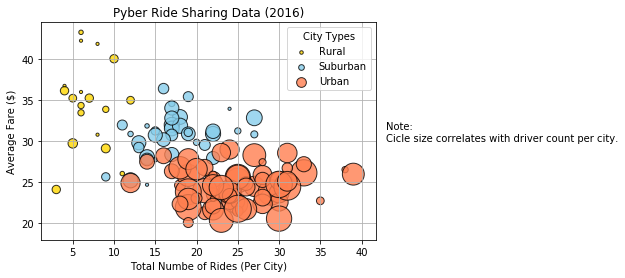

In [25]:
colors = ['Gold', 'SkyBlue','Coral']
city_types = sorted(city_ride_data_df['type'].unique())

total_activity = pd.DataFrame()
 
for x in range(len(city_types)):
                     
    city_type = city_ride_data_df[(city_ride_data_df.type == city_types[x])]
    rides_per_city = city_type.groupby(['city'])['ride_id'].count()
    drivers_per_city = city_type.groupby(['city'])['driver_count'].mean()*10
    avg_fare = round(city_type.groupby(['city'])['fare'].mean(),2)

    # Obtain the x and y coordinates for each of the three city types
    activity = pd.DataFrame({
        'type'    : city_type.groupby(['city'])['type'].max(),
        'rides'   : rides_per_city,
        'fare'    : avg_fare,
        'drivers' : drivers_per_city,
    })
    
    # Build the scatter plots for each city types
    plt.scatter(activity.rides.values, activity.fare.values, s = activity.drivers.values, 
                alpha=0.8, color=colors[x], edgecolor = 'black', label=city_types[x])
    total_activity = total_activity.append(activity)
    
# Incorporate the other graph properties
plt.grid()

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Numbe of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
plt.legend(loc='upper right', title='City Types', markerscale = .5 )

# Incorporate a text label regarding circle size
plt.text(43,30, 'Note: \nCicle size correlates with driver count per city.')

# Save Figure
plt.savefig('images/pyberBubbles.png')

plt.show()

## Total Fares by City Type

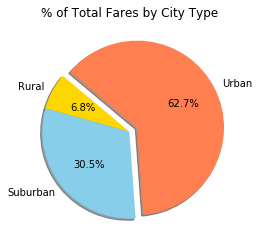

In [26]:
# Calculate Type Percents
fares_by_citytype= (city_ride_data_df.groupby(['type'])['fare'].sum() / city_ride_data_df['fare'].sum())*100

# Build Pie Chart
explode = (0, 0, 0.1)
plt.pie(fares_by_citytype.values, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('images/pyberFaresPie.png')

## Total Rides by City Type

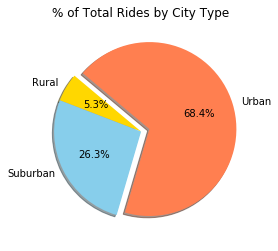

In [27]:
# Calculate Ride Percents
fares_by_citytype= (total_activity.groupby(['type'])['rides'].sum() / total_activity['rides'].sum())*100

# Build Pie Chart
explode = (0, 0, 0.1)
plt.pie(fares_by_citytype.values, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('images/pyberRidesPie.png')

## Total Drivers by City Type

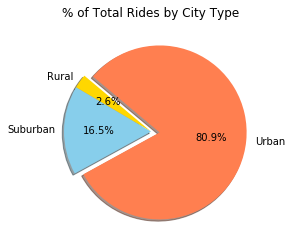

In [28]:
# Calculate Driver Percents
fares_by_citytype= (total_activity.groupby(['type'])['drivers'].sum() / total_activity['drivers'].sum())*100

# Build Pie Chart
explode = (0, 0, 0.1)
plt.pie(fares_by_citytype.values, explode=explode, labels=city_types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('images/pyberDriversPie.png')
